In [1]:
from __future__ import division

import os
import numpy as np
import pandas as pd
import ta
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [7]:
df_nofil = pd.read_csv('nofilter.csv')
df_wave = pd.read_csv('WAVE.csv')
df_kal = pd.read_csv('Kalman.csv')

In [8]:
df_spy = pd.read_csv('DF_SPY.csv', parse_dates=['Date'], index_col=['Date'])

In [9]:
df = df_nofil
df['LSTM + Wavelet'] = df_wave['Wave + LSTM']
df['LSTM + Kalman'] = df_kal['Kalman + LSTM']
df.index = df_spy[-len(df):].index

In [10]:
df.head()

,LSTM w/o Filter,LSTM + Wavelet,LSTM + Kalman
Date,,,
2014-11-06,100.000000,100.000000,100.000000
2014-11-07,99.965054,100.034959,100.034959
2014-11-10,99.654114,100.347086,100.347086
2014-11-11,99.584734,100.416997,100.416997
2014-11-12,99.654604,100.346593,100.346593


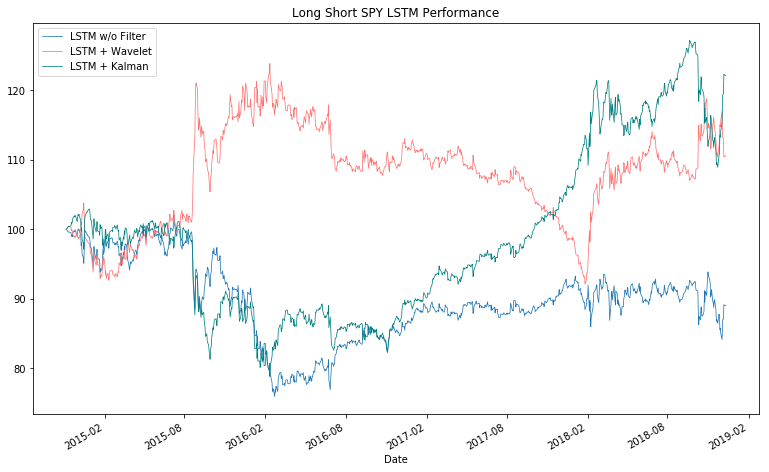

In [11]:
ax = df['LSTM w/o Filter'].plot(figsize=[13, 8], linewidth=0.75, title='Long Short SPY LSTM Performance')
df['LSTM + Wavelet'].plot(color='#ff7373', linewidth=0.75)
df['LSTM + Kalman'].plot(color='#008080', linewidth=0.75)
ax.legend()